<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD20_Evaluation_Metric(220808).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20-2. Loss와 Metric

- Loss : 모델 학습시 학습데이터를 바탕으로 게산되어, 모델의 파라미터 업데이트에 활용되는 함수

- Metric : 모델 학습 종료 후 테스트데이터를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수

## 정확도가 학습단계에 좋은 Loss가 될 수 없는 이유 (https://kharshit.github.io/blog/2018/12/07/loss-vs-accuracy)
- 별도의 정확도는 지속되는 Corss Entropy에 비해, 파라미터가 학습되어야 할 방향을 정확하게 제시하지 못함.

- 정확도를 기준으로 한다면 모델이 이미 완벽한 정확도에 도달한다면 더이상 정교한 학습이 이루어질 여지가 적어서 확률분포의 차이가 더 커지도록 학습이 진행되지 않음.

# 20-3. Confusion Matrix 와 Precision/Recall

## Confusion Matrix(혼동행렬)이란?

- 분류모델에서 사용하는 평가지표로써, 모델의 예측과 실제가 어느정도 일치한지 불 수 있음.

- 정확도 : (분류와 예측이 일치하는 경우) / 모든 경우

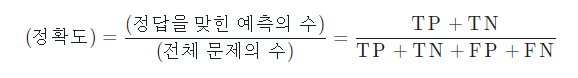

- 정밀도 : 참 긍정 / (참 긍정 + 거짓 긍정)
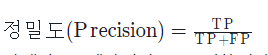

- 재현율 = 참 긍정 / (참 긍정 + 거짓 긍정)
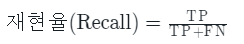

- F-score : 2 * ((정밀도*재현율) / (정밀도+재현율))
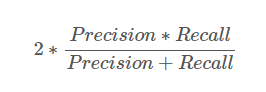

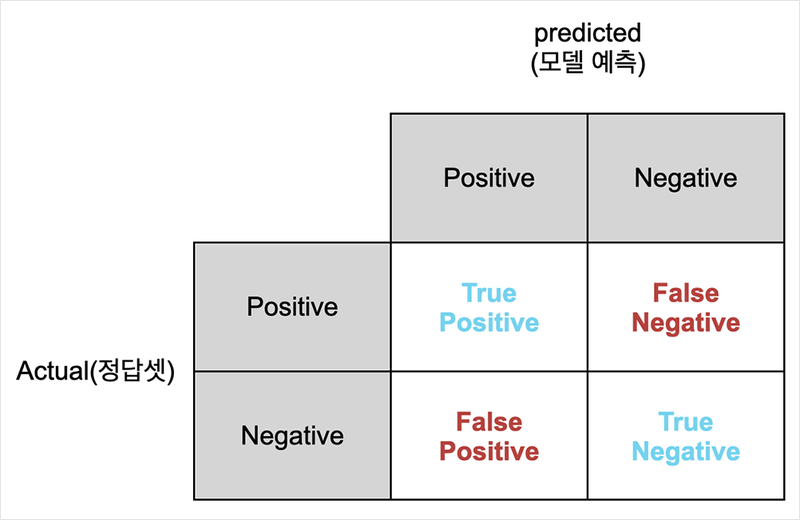

# 20-4. Threshold의 변화에 따른 모델 성능

- Threshold(기준선)이 변하면 모델의 성능이 다르게 보임

In [ ]:
# data 준비
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape) # (150, 4)

(150, 4)


In [ ]:
# Task의 재구성
random_state = np.random.RandomState(0)
n_sample, n_features = X.shape
X = np.c_[X, random_state.randn(n_sample, 200 * n_features)]
print(X.shape) # (150, 804)

(150, 804)


In [ ]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


In [ ]:
# 모델 학습
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)
# classifier.score() 함수는 테스트데이터에 대한 평균 정확도(Accuracy)를 리턴합니다. 
# 0.5에 가까운 수준의 binary classifier라니, 전혀 분류 성능이 없다고 봐야한다.

0.48

In [ ]:
# 모델 학습2 커널 변경
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

In [ ]:
classifier.predict(X_test)
# 0보다 작으면 음성, 0보다 크면 양성 (음성 : 0), (양성 : 1)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [ ]:
# decision_function()
y_score = classifier.decision_function(X_test)
print(y_score)


[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


In [ ]:
# 혼동 행렬과 분류 결과 요약보기
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [ ]:
# 양성기준을 변경한 혼동 행렬과 분류 결과 요약보기
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)

rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

# 재현율이 0.77 > 0.81로 상승

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [ ]:
# 양성기준을 변경한 혼동 행렬과 분류 결과 요약보기
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)

rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

# 재현율이 0.77 > 0.92로 상승 / 기준이 -0.2일때
# 재현율이 0.77 > 1.00로 상승 / 기준이 -0.3일때
# 재현율이 0.77 > 0.54로 하락 / 기준이 0.1 일때

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



# 20-5. Precision-Recall 커브

- X축(재현율), Y축(정밀도)로 나타내는 그래프

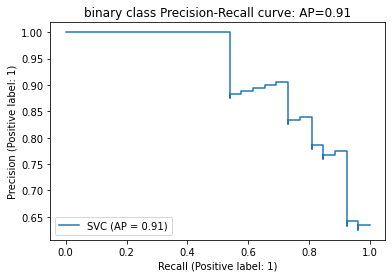

In [ ]:
# PR커브 그리기
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                    'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

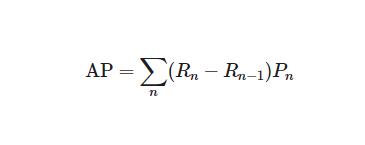

In [ ]:
# AR(평균 정밀도) 구하기
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)
print('평균 precision-recall score: {0:0.2f}'.format(average_precision))

평균 precision-recall score: 0.91


In [ ]:
# SVM 커널 : poly
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.91')

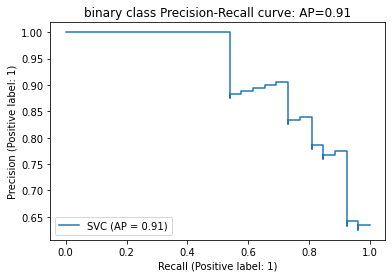

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                    'AP={0:0.2f}'.format(disp.average_precision))

# 'linear'와 큰 차이는 없는 것으로 나타남.

# 20-6. ROC 커브

- X축 (FPR), Y축(TPR)로 그려지는 분류기 성능 그래프

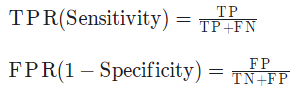

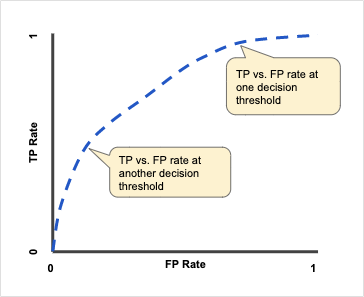

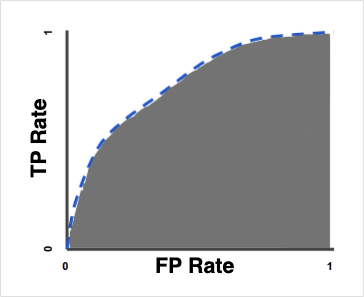

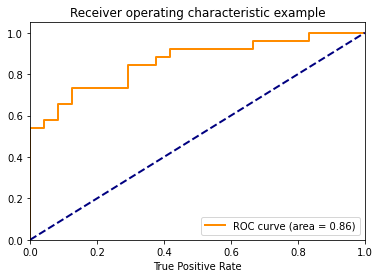

auc result:0.8605769230769231


In [ ]:
# roc-auc 그리기
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

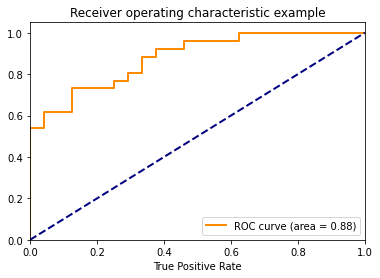

auc result:0.8798076923076923


In [ ]:
# svm의 커널을 바꿔가며 roc 커브 그리기
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed'
from sklearn import svm
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel = 'sigmoid', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

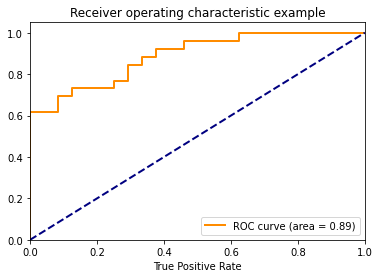

auc result:0.8878205128205128


In [ ]:
# svm의 커널을 바꿔가며 roc 커브 그리기
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed'
from sklearn import svm
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel = 'rbf', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

# 20-7. 다양한 머신러닝 모델의 평가척도

[회귀의 오류 지표 알아보기](https://partrita.github.io/posts/regression-error/)

#### square 계열과  absolute value 계열 Metric이 특이 값에 대해 보이는 차이

- square계열은 특이값에 민감하게 반응, absolute value 계열 특이값에 민감하지않고 이상치가 많은 데이터에 대해 강건

[기계번역 모델의 평가척도](https://donghwa-kim.github.io/BLEU.html)

#### BLEU score는 결국 두 텍스트가 얼마나 겹치는지를 측정하는 척도입니다. BLEU에서는 텍스트가 겹치는 정도를 어떻게 측정하나요?

- 1-gram, 2-gram, 3-gram, 4-gram이 두 문장 사이에 몇번이나 공통되게 출현하는지를 측정합니다.

[랭킹 모델의 평가척도](https://lamttic.github.io/2020/03/20/01.html)

####  NDCG가 MRR, MAP 등 이전 평가척도들에 비해 어떤 부분에서 좋은가?

- 랭킹을 매기기 위해 임의성을 배제하고 모든 콘텐츠 아이템에 대한 관련성을 계산하여 랭킹에 반영

[이미지 생성 모델의 평가척도](https://medium.com/@datamonsters/a-quick-overview-of-methods-to-measure-the-similarity-between-images-f907166694ee)

#### MSE나 PSNR 대비 SSIM이 가지는 가장 큰 차이점은 무엇인가요?

- MSE나 PSNR은 모두 픽셀 단위로 비교해서 거리를 측정한다. 그러나 이 방식은 이미지가 약간 평행이동해 있어도 두 차이를 크게 측정하는 단점이 있다. SSIM은 이와 달리 픽셀 단위 비교보다는 이미지 내의 구조적 차이에 집중하는 방식을 쓴다.
